<a href="https://colab.research.google.com/github/msiddalingaiah/MachineLearning/blob/master/Regression/DeepHousingModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%tensorflow_version 2.x

In [0]:
import pandas as pd
import numpy as np
import keras
from keras.layers import Dense, Dropout
from keras.models import Sequential
from keras import metrics
from keras.optimizers import Adam

from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import random

In [3]:
data = pd.read_csv('kc_house_data.csv')
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [0]:
Y = data['price'].values/1000
#columns = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long', 'sqft_living15', 'sqft_lot15']
columns = ['sqft_living', 'sqft_lot', 'floors', 'waterfront', 'sqft_above', 'sqft_basement']
dfs = data[columns]

X = dfs.values
scaler = StandardScaler()
X = scaler.fit_transform(X)

zipcodes = pd.get_dummies(data['zipcode']).values
condition = pd.get_dummies(data['condition']).values
grade = pd.get_dummies(data['grade']).values
bedrooms = pd.get_dummies(data['bedrooms']).values
bathrooms = pd.get_dummies(data['bathrooms']).values

X = np.concatenate((X,zipcodes),axis = 1)
X = np.concatenate((X,condition),axis = 1)
X = np.concatenate((X,grade),axis = 1)
X = np.concatenate((X,bedrooms),axis = 1)
X = np.concatenate((X,bathrooms),axis = 1)

x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.25,random_state=42)

In [0]:
dropout = 0.1

model = Sequential()
model.add(Dense(100, activation="relu", input_shape=(x_train.shape[1],)))
model.add(Dropout(dropout))
model.add(Dense(50, activation="relu"))
model.add(Dropout(dropout))
model.add(Dense(20, activation="relu"))
model.add(Dropout(dropout))
model.add(Dense(1))

In [6]:
model.compile(loss='mean_squared_error', optimizer=Adam())

history = model.fit(x_train,y_train,epochs=20, verbose=1, validation_data=(x_test, y_test))
print(model.evaluate(x_test,y_test))

Train on 16209 samples, validate on 5404 samples
Epoch 1/20
16209/16209 [==============================] - 1s 76us/step - loss: 122628.2652 - val_loss: 41674.4314
Epoch 2/20
16209/16209 [==============================] - 1s 63us/step - loss: 35042.8955 - val_loss: 29794.1452
Epoch 3/20
16209/16209 [==============================] - 1s 64us/step - loss: 29517.3694 - val_loss: 25719.4855
Epoch 4/20
16209/16209 [==============================] - 1s 63us/step - loss: 26970.7493 - val_loss: 23584.1935
Epoch 5/20
16209/16209 [==============================] - 1s 64us/step - loss: 25675.3297 - val_loss: 22152.7280
Epoch 6/20
16209/16209 [==============================] - 1s 65us/step - loss: 25020.7296 - val_loss: 21355.3155
Epoch 7/20
16209/16209 [==============================] - 1s 63us/step - loss: 23920.5089 - val_loss: 20353.8952
Epoch 8/20
16209/16209 [==============================] - 1s 65us/step - loss: 22681.4977 - val_loss: 19992.7806
Epoch 9/20
16209/16209 [======================

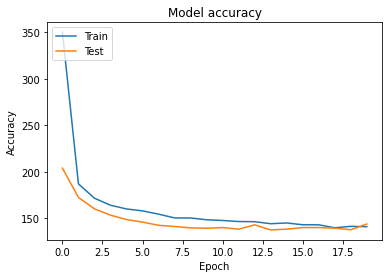

In [7]:
plt.plot(np.sqrt(history.history['loss']))
plt.plot(np.sqrt(history.history['val_loss']))
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [0]:
y_pred = model.predict(x_test).squeeze()

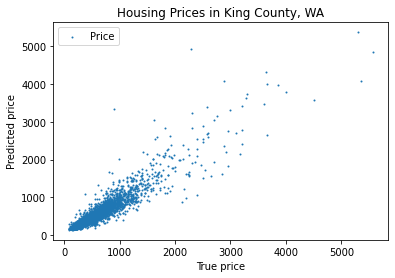

In [36]:
plt.scatter(y_test, y_pred, label="Price", s=1.0)
plt.title("Housing Prices in King County, WA")
plt.xlabel("True price")
plt.ylabel("Predicted price")
plt.legend()
plt.show()

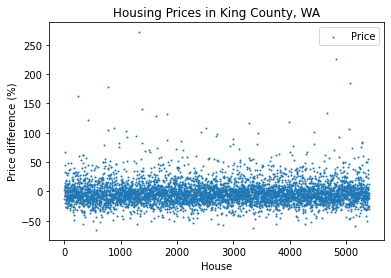

In [37]:
delta = 100*(y_pred - y_test)/y_test
plt.scatter(range(len(delta)), delta, label="Price", s=1.0)
plt.title("Housing Prices in King County, WA")
plt.xlabel("House")
plt.ylabel("Price difference (%)")
plt.legend()
plt.show()

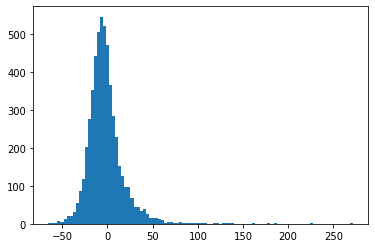

In [38]:
plt.hist(delta, 100)
plt.show()

In [0]:
trainDF, testDF = train_test_split(data, test_size = 0.25,random_state=42)

In [0]:
predDF = pd.DataFrame({'predicted_price' : y_pred*1000, 'delta_percent': delta})

In [65]:
df = pd.concat([predDF, testDF.reset_index()], axis=1)
df.head()

,predicted_price,delta_percent,index,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,3.168907e+05,-13.180642,735,2591820310,20141006T000000,365000.0,4,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700
1,8.797761e+05,1.708215,2830,7974200820,20140821T000000,865000.0,5,3.00,2900,6730,1.0,0,0,5,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283
2,1.141861e+06,10.005897,4106,7701450110,20140815T000000,1038000.0,4,2.50,3770,10893,2.0,0,2,3,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685
3,1.607741e+06,7.902095,16218,9522300010,20150331T000000,1490000.0,3,3.50,4560,14608,2.0,0,2,3,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226
4,6.683429e+05,-5.999584,19964,9510861140,20140714T000000,711000.0,3,2.50,2550,5376,2.0,0,0,3,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050


In [82]:
df[(df.price < 600000) & (df.delta_percent <= -10)]

,predicted_price,delta_percent,index,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,316890.656250,-13.180642,735,2591820310,20141006T000000,365000.0,4,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700
20,355678.218750,-26.664284,3018,2291401425,20140910T000000,485000.0,5,2.00,1910,5508,1.0,0,0,3,7,1020,890,1968,0,98133,47.7074,-122.349,1030,7440
25,478410.437500,-12.857845,13958,8651540040,20140718T000000,549000.0,3,2.25,1920,10961,2.0,0,0,3,8,1920,0,1981,0,98074,47.6432,-122.057,2000,10706
27,204461.906250,-25.650213,18059,1773101530,20141218T000000,275000.0,1,1.00,520,4800,1.0,0,0,3,5,520,0,1930,0,98106,47.5533,-122.363,800,4960
37,344675.875000,-28.932810,5512,1822069109,20140910T000000,485000.0,3,2.50,2540,51836,1.0,0,0,4,8,1820,720,1976,0,98042,47.3890,-122.088,1650,51836
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5377,236697.234375,-21.100922,17762,7750500120,20141118T000000,300000.0,3,1.00,950,4760,1.5,0,0,3,6,950,0,1929,0,98106,47.5236,-122.348,1080,4760
5388,272915.718750,-13.634269,8574,6666860210,20140602T000000,316000.0,3,2.25,2130,8721,1.0,0,0,3,8,1570,560,1987,0,98031,47.4202,-122.204,2130,9477
5389,294693.968750,-24.918734,11141,5467200055,20150307T000000,392500.0,4,2.75,2400,19923,1.0,0,0,5,7,1320,1080,1953,0,98042,47.3616,-122.144,2470,10736
5392,341768.500000,-10.037248,19749,6362900138,20141103T000000,379900.0,2,1.50,1240,1331,2.0,0,0,3,7,1050,190,2007,0,98144,47.5959,-122.298,1250,1431
